### Text Mining 'Events of 20th century' webpage

In [1]:
# Import libraries

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to C:\Users\Usha
[nltk_data]     Bharati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Usha
[nltk_data]     Bharati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usha Bharati\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
myfile = open('20th_century_Wiki.txt', encoding='utf-8') 

In [3]:
# Importing txt file

with open('20th_century_Wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [4]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Events in the 20th centuryToggle Events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holocaust1.3.12The N

In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Events', 'in', 'the', '20th', 'centuryToggle', 'Events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'dictatorship1.3Global', '

In [6]:
# Creating frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4897 samples and 20427 outcomes>


In [7]:
dist_words.most_common(10)

[('.', 1274),
 ('the', 1095),
 (',', 990),
 ('of', 604),
 ('and', 398),
 ('to', 325),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

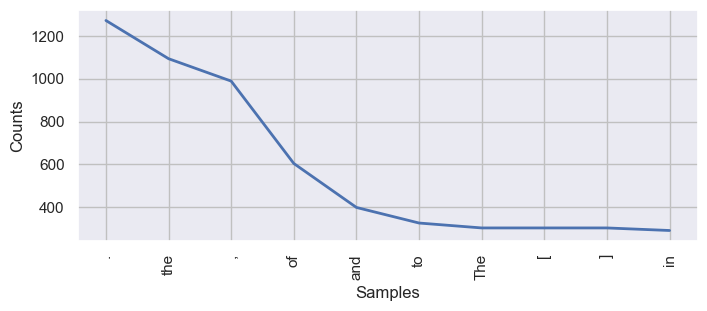

In [88]:
# Frequency Distribution Plot for the 10 most common words

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

### Plot above gives result where punctuations are there along with not so useful words from the text.

In [9]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'not', 'a', 'and', 'were', 'by', 'own', 'was', 'yours', 'there', 'ma', 'more', 'their', "you've", 'o', 'very', 'over', 'with', 'before', 've', 'those', 'here', 'then', 'shan', 'd', 'between', 'don', 're', 'same', "that'll", "didn't", 'i', 'having', 'shouldn', 'against', 'our', 'during', 'isn', 'at', 'been', 'herself', 'after', 'all', "weren't", 'who', 'whom', 'if', 'my', 'into', 'had', 'hers', 'out', 'than', "it's", 'is', "mightn't", 'how', 'below', "mustn't", 'being', "aren't", "she's", 'the', 'most', 'your', "doesn't", 'or', 'in', 's', 'just', 'am', 'further', "wouldn't", 'up', 'both', 'wasn', 'be', 'needn', 'on', 'm', 'while', 'has', 'mustn', 'his', 'no', 'didn', 'for', "you're", 'themselves', 'we', 'an', "shan't", 't', 'such', "shouldn't", 'doesn', 'wouldn', "couldn't", 'which', 'yourself', 'him', 'why', 'can', 'as', 'll', 'under', 'but', 'above', 'these', 'does', 'yourselves', "don't", 'it', 'haven', 'ourselves', 'have', 'will', 'couldn', 'when', "haven't", 'they', 'ours', 'what'

In [10]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [11]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Events',
 '20th',
 'centuryToggle',
 'Events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '1939â€',
 '“',
 '1945',
 '

In [12]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4794 samples and 15770 outcomes>


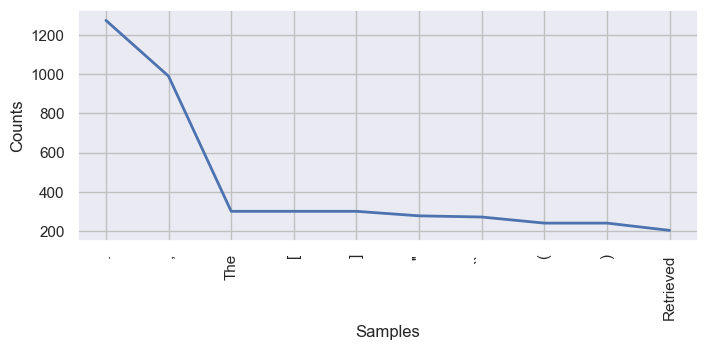

In [13]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

### The plot above which is obtained after using stopwords contains punctuations in majority, so it is not that helpful.

In [14]:
dist_words_filter

FreqDist({'.': 1274, ',': 990, 'The': 302, '[': 302, ']': 302, "''": 279, '``': 273, '(': 242, ')': 242, 'Retrieved': 205, ...})

In [15]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [16]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Events      th    centuryToggle    Events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                          The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Blitzkrieg     Operation    Barbarossa     T

In [17]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'th', 'centuryToggle', 'Events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'All

In [18]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

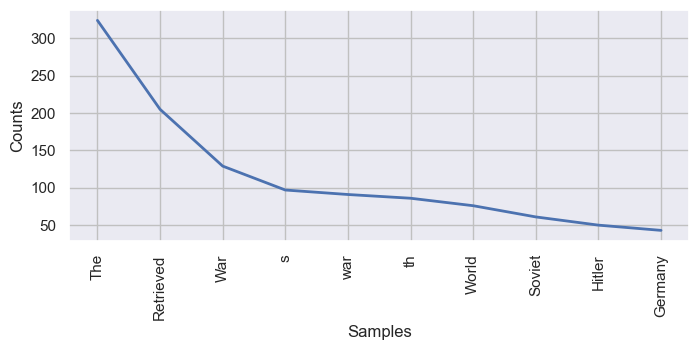

In [70]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative = False)
plt.show()

#### The above plot is obtained after removing the punctuations and is lot better now for understanding.
#### We can see name of country- German , words like 'World', 'Soviet'. There is use of word 'war' lot frequently which is understandable as the webpage talks about the history and covers all events that took place in 20th century.

In [72]:
dist_words_filter_2.most_common(10)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43)]

## POS tags with textblob

In [73]:
new_stopwords = ["th", "s", 'S', 'edit', 'this', 'The','www']

In [74]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [75]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 15.2 ms


In [76]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Events', 'centuryToggle', 'Events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive', 'Final', 'days', 'Holocaust', '

In [77]:
tags_list = text.tags

In [78]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS'),
 ("'more

In [80]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]
df_text['Words'] = df_text['Words'].str.lower()

In [81]:
df_text.head()

,Words,Word type
0,[,JJ
1,'key,NNP
2,',POS
3,'events,NNS
4,',POS


In [82]:
df_t = df_text.groupby('Word type').count().reset_index()

In [83]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [156]:
top10 = df_t.nlargest(10, 'Words')

## Bar chart for top 10 POS tags using seaborn library

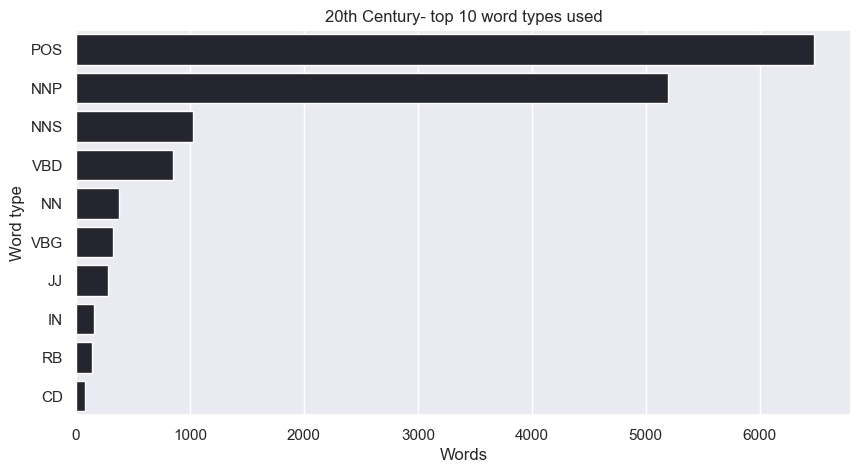

In [85]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century- top 10 word types used")

## Three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

#### 1.Noun

In [53]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [54]:
top15

,Word,Occurences
2215,'war,221
2279,'world,115
960,'history,64
1935,'soviet,62
1436,'new,53
776,'first,51
964,'hitler,50
325,'century,42
1020,'in,39
2291,'www,39


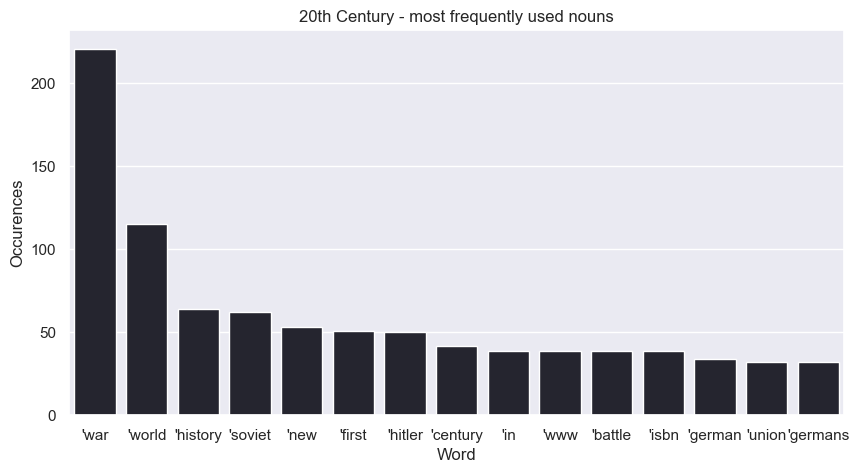

In [58]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th Century - most frequently used nouns")

### Based on the plot we can notice that the words like 'war','world' are prominently used as they webpage discusses about the historical war and the global matters.
### Words like century, history indicate that there is discussion on significant historical contexts pertaining to a century. 
### Words -war, world, history in high occurences well indicate the context of 20th century webpage.

### 2.Verbs

In [60]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [62]:
top15

,Word,Occurences
237,'retrieved,205
289,'united,30
8,'allied,21
165,'led,15
293,'used,13
13,'archived,13
162,'launched,12
58,'controlled,9
201,'planned,8
127,'forced,8


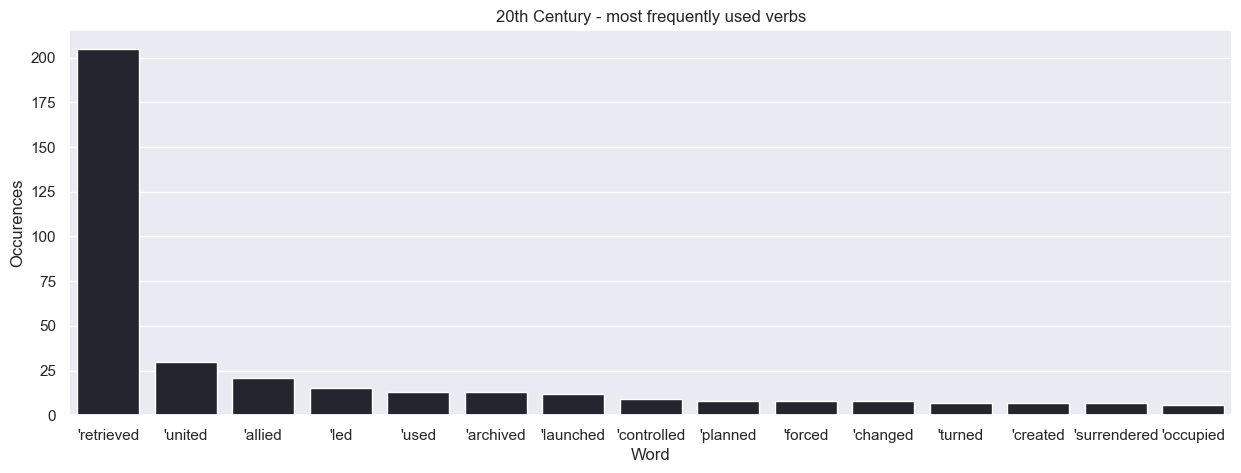

In [65]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th Century - most frequently used verbs")

### Word 'retrieved' occurs mostly indicating focus on accessing historical records. 
### As observed from noun plot the word 'war' occurs frequently, to that the occurence of verbs like allied, united does connect to, becuase there were allies forming during wars. 
### Words like launched, planned, controlled does indicate the context of the webpage.

### 3.Adjectives

In [66]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [67]:
top15

,Word,Occurences
54,'japanese,36
4,'american,24
10,'atlantic,13
43,'guardian,10
78,'political,9
23,'chinese,7
66,'much,6
3,'african,6
88,'russian,6
80,'possible,5


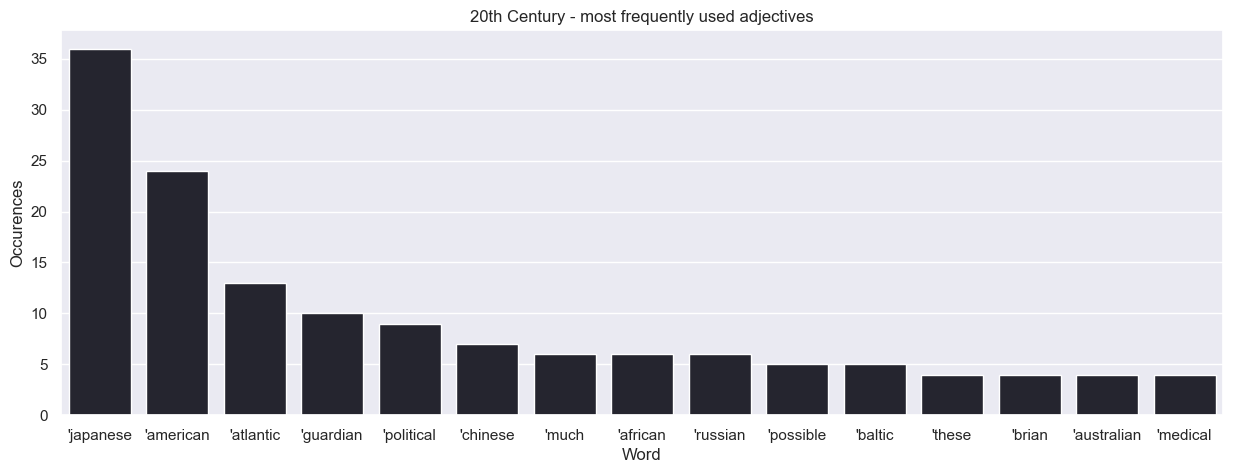

In [69]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th Century - most frequently used adjectives")

#### Words Japanese, American, atlantic occurences hint towards world war II. 
#### Word political indicates about discussion during the century. Similarly chinese,russian,australian words hint towards the discussion of polictial history or history of these countries in general.

 ## Dataframe with the countries and the number of times they’re mentioned in the text 

In [97]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Events centuryToggle Events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events century languages Edit link

In [98]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [99]:
all_counts

Counter({'Retrieved': 205,
         'War': 129,
         'war': 91,
         'World': 76,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'world': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'century': 36,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'American': 24,
         'history': 23,
         'This': 23,
         'attack': 23,
         'weapons': 23,
         'new': 22,
         'Holocaust': 21,
         'Stalin': 21,
         'Africa': 21,
         'British': 20,
         'North': 20,
         'Allied': 

In [114]:
countries = pd.read_csv(r'C:/Users/Usha Bharati/OneDrive/Desktop/CF-Achievement 1/countries_list_20th_century_1.5.csv',index_col=0)

In [115]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [128]:
countries_list = countries['country_name'].to_list()
countries_list = countries['country_name'].str.strip().to_list()

In [129]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [130]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [131]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [132]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df = df.transpose().reset_index()

In [134]:
df.dtypes

index    object
0         int64
dtype: object

In [144]:
df

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [142]:
df.rename(columns = {"Character":"Country", 0:"Times mentioned"}, inplace = True)

In [143]:
df

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [145]:
df.shape

(208, 2)

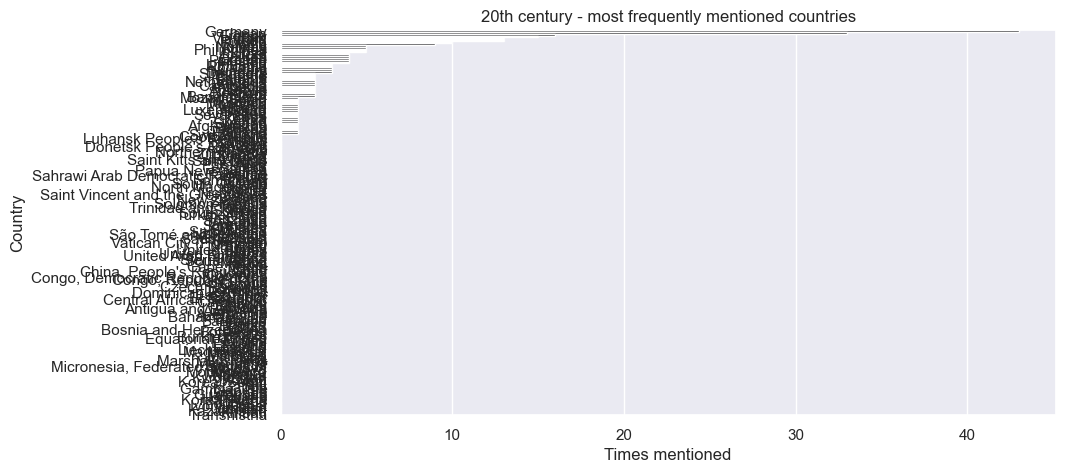

In [146]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("20th century - most frequently mentioned countries")

#### The above plot looks very clumsy with names of countries on y-axis overlapping one another. 
#### As we can observe that,there are countries which are not mentioned in the webpage(times mentioned is 0), so I am excluding those countries to get a proper plot which is readable.

In [147]:
df_filtered_1 = df[df['Times mentioned'] > 0]

In [148]:
df_filtered_1 = df_filtered_1.sort_values(by='Times mentioned', ascending=False)

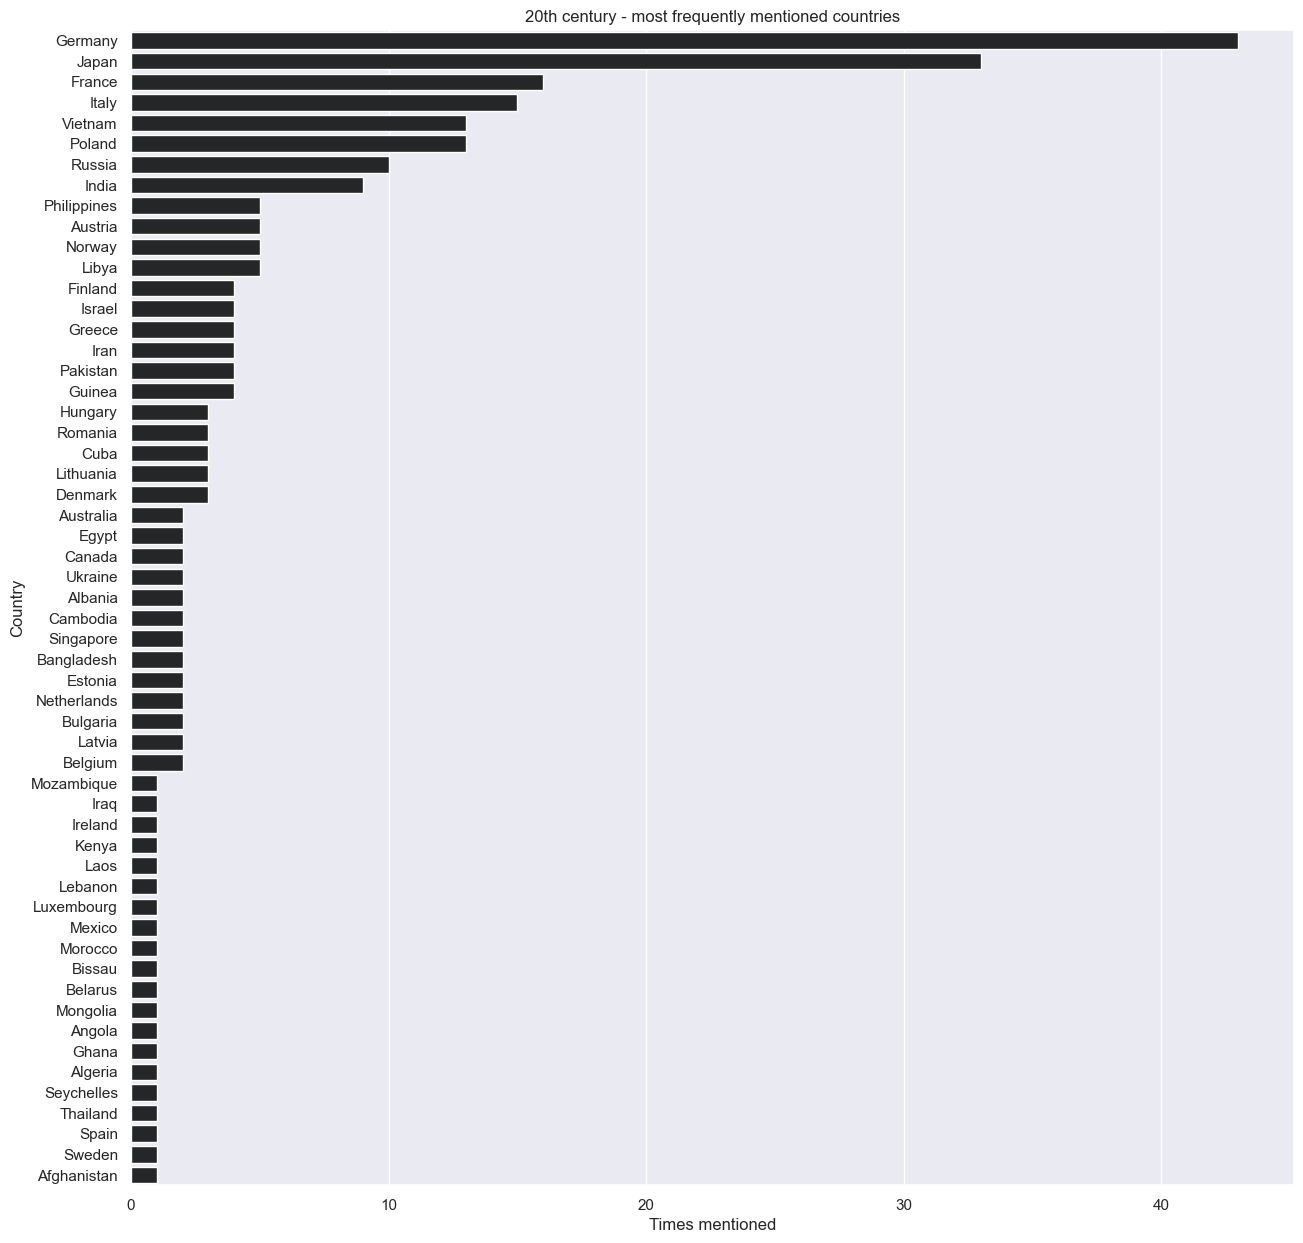

In [155]:
plt.figure(figsize=(15, 15))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df_filtered_1.sort_values("Times mentioned", ascending = False)).set_title("20th century - most frequently mentioned countries")

#### The above plot shows the country names showing how many times they are mentioned in the web page. We can see that Germany is mentioned the highest number of times and it is understandable because it played crucial role during the 20th century.
#### Japan is next to Germany in its occurence due to the world war II which took place during that time period. 
#### The countries which are mentioned as per the plot for example-european countries, asian countries etc are very important from the prespective of the time period under consideration.  